In [1]:
import numpy as np
import pickle
import os
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd

from modules.md_c_interface import launch_simulation

from time import time, sleep

from modules.md_utils import complementaire # utils
from modules.md_utils import plot_crystal, plot_2d_simu # plotting
from modules.md_utils import process_results

# 1ère partie, états finaux des N ions

Ions should be selected amongst the ones available [here](../md2_notebook_resources/available_ion.png).

As for the parameters, a lots of them are available. You can see them all in [1](../md2_notebook_resources/table_key_description_1.png), [2](../md2_notebook_resources/table_key_description_2.png) and [3](../md2_notebook_resources/table_key_description_3.png).

For simplicity reasons, only a few are available in the following algorithms : ion, ionE, Tset, ionT, ionP, tau, n, dt, dtv and i1.

Which should be given for example like :

```python
params = {
    '-ion' : "Ar",
    '-ionE' : 50, # eV
    '-Tset' : 300, # K
    '-ionT' : 0, # Degree
    '-ionP' : 0, # Degree
    '-tau' : 0.01, # s
    '-n' : 250, # nb time steps
    '-dt' : 1.e-3, # time step, s
    '-i1' : 2, 
}

flags = ['+dtv']
```

# Quelques simulations 

In [2]:
colors = {
    'Si':'gray',
    'Ar':'darkviolet',
    'I':'violet',
    'Kr':'lightskyblue',
    'Xe':'dodgerblue',
    'CF3':'red'
}
radii = {
    'Si': 1.11, # Angstrom
    'Ar' : 1.06,
    'I' : 1.98,
    'Kr': 2.02,
    'Xe':2.17,
    'CF3': 1
}

In [3]:
ions = ['Ar','I','Kr','Xe', 'CF3']
names = ['../md2_results/test_{}'.format(ion) for ion in ions]
    
params = {
    '-ion' : "XX",
    '-ionE' : 0.001, # eV
    '-Tset' : 1000, # K
    #'-ionT' : 20, # Degree - phi incident - polar angle
    #'-ionP' : 0, # Degree - theta incident - azimutal angle
    '-tau' : 0.01, # s
    '-n' : 1000, # nb time steps
    '-dt' : 2.e-4, # time step, s
    '-i1' : 5, # number of ions launched 
}

flags = ['+dtv']

In [4]:
for ion, name in zip(ions, names):
    params['-ion'] = ion
    launch_simulation(name, params, flags)

./md2 -oc cfg/####.cfg -ion Ar -ionE 0.001 -Tset 1000 -tau 0.01 -n 1000 -dt 0.0002 -i1 5 +dtv  > log &
./md2 -oc cfg/####.cfg -ion I -ionE 0.001 -Tset 1000 -tau 0.01 -n 1000 -dt 0.0002 -i1 5 +dtv  > log &
./md2 -oc cfg/####.cfg -ion Kr -ionE 0.001 -Tset 1000 -tau 0.01 -n 1000 -dt 0.0002 -i1 5 +dtv  > log &
./md2 -oc cfg/####.cfg -ion Xe -ionE 0.001 -Tset 1000 -tau 0.01 -n 1000 -dt 0.0002 -i1 5 +dtv  > log &
./md2 -oc cfg/####.cfg -ion CF3 -ionE 0.001 -Tset 1000 -tau 0.01 -n 1000 -dt 0.0002 -i1 5 +dtv  > log &


In [17]:
results_Ar = process_results(Path.cwd()/'md2_sources'/names[0])

ic| results_Ar.ion.extract_angles(): [[180.0, nan], [180.0, nan], [180.0, nan], [180.0, nan], [180.0, nan]]


Format : name ion - theta - phi


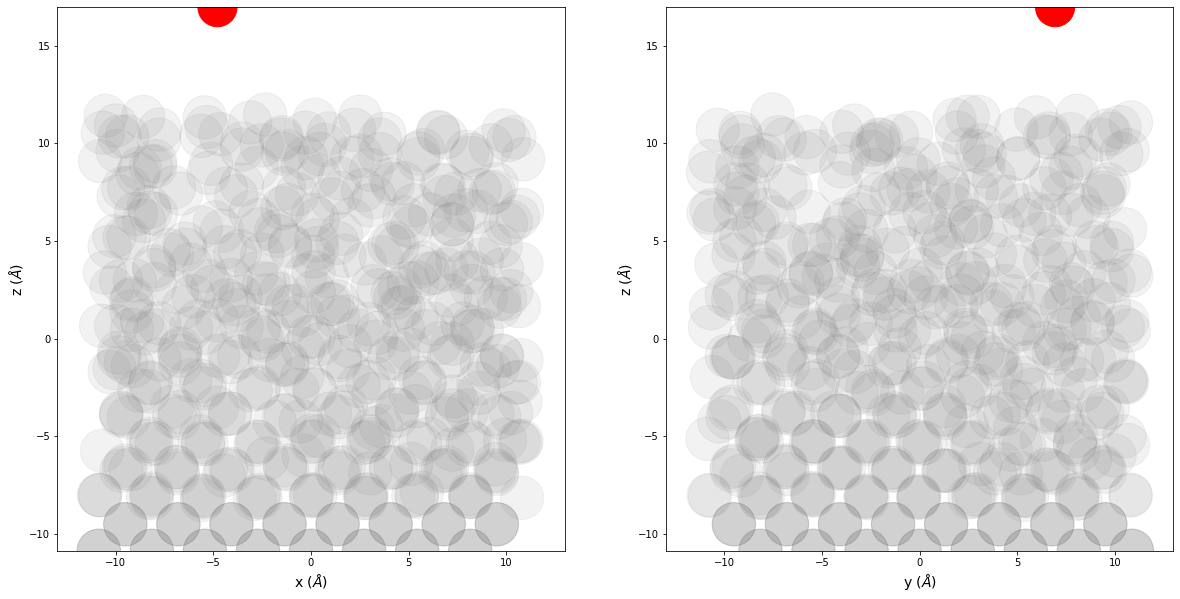

In [18]:
print(r'Format : name ion - theta - phi')
a = ic(results_Ar.ion.extract_angles())
plot_2d_simu(ion, results_Ar.ion.dataframes['0001.ion'], results_Ar.crystal.dataframes['0001.cfg'], radii, colors, start = True)

# Plotting additional stuff

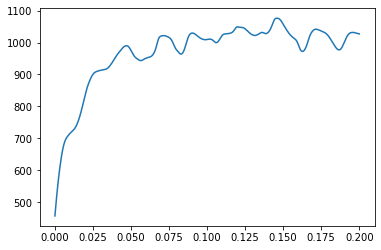

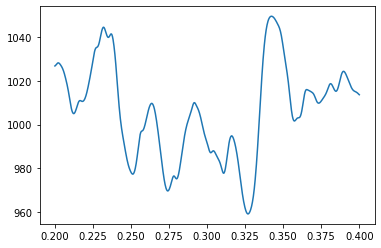

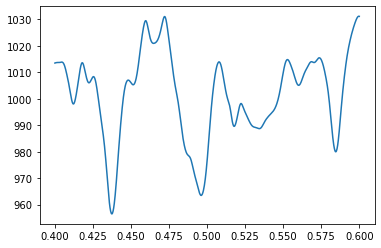

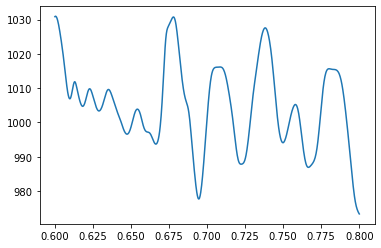

In [22]:
for k in range(results_Ar.log.nb_traj) :
    results_Ar.log.plot_instantaneous_temperature_K(k)
    plt.show()


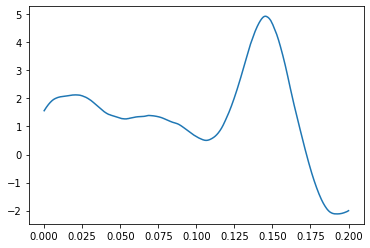

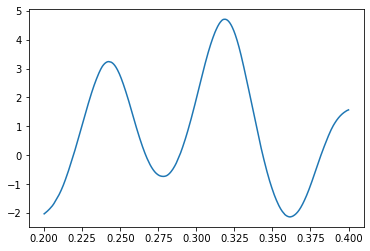

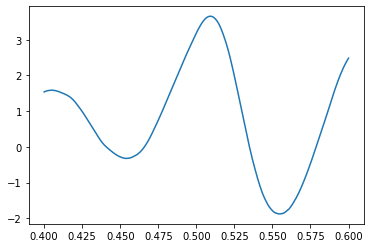

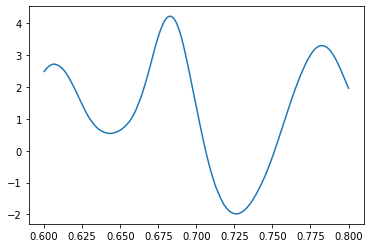

In [21]:
for k in range(results_Ar.log.nb_traj) :
    results_Ar.log.plot_evolution(k, 'Plat [GPa]')
    plt.show()

# Bins for now

NameError: name 'df' is not defined

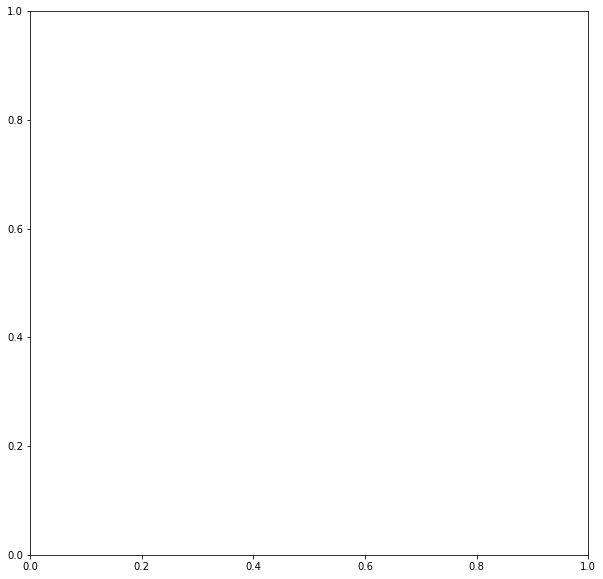

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

ax.hist(df['KE/TE_i'])
ax.set_xlabel('KE/TE_i',size=20)
ax.set_ylabel('effectif',size=20)

fig.show()

In [ ]:
fig = go.Figure(
        data=go.Scatter3d(
            x=df['x'], 
            y=df['y'], 
            z=df['z'], 
            marker=dict(
                size=2,
                color=df['KE/TE_i'],
                colorscale='magma'
                ),
            line=dict(
                color='darkblue',
                width=2
                )
            )
        )

fig.update_layout(
    width=1000, 
    height=700, 
    scene = dict( 
        xaxis_title='X (A)',
        yaxis_title='Y (A)',
        zaxis_title='Z (A)'
        ),
    margin=dict(
        r=0, 
        b=100, 
        l=0, 
        t=100
        ),
    plot_bgcolor='white'
    )

fig.show()